In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder


# function for plotting decision regions, credits: Raschka & Mirjalili

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                       alpha=0.8, c=colors[idx],
                       marker=markers[idx], label=cl,
                       edgecolor='black')
        
    # highlight test samples
    if test_idx:
           # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                       c='', edgecolor='black', alpha=1.0,
                       linewidth=1, marker='o',
                       s=100, label='test set')

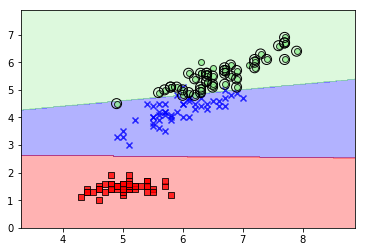

In [38]:
df = pd.read_csv('iris.csv', header = None, names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Species"])

# initialize classifiers

C = 1.0
models = (svm.SVC(kernel = 'linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma = 0.7, C=C),
          svm.SVC(kernel='poly', degree = 3, C=C))

#seperate data from 'answers'

x, y = df.drop('Species', axis=1), df.Species

# convert labels to integers for compatibility with plot_decision_regions function 
le = LabelEncoder()
y_enc = le.fit_transform(y)

x = x.values
y = y_enc

# retain two features for plotting

x = x[:,[0,2]]

# train the classifier 

models = [clf.fit(x,y) for clf in models]

# linear kernel
plot_decision_regions(x,y, classifier = models[0], test_idx=range(105,150))

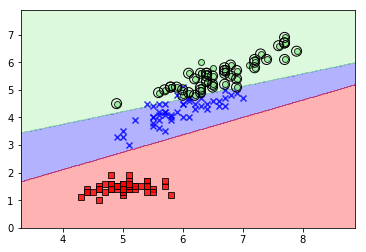

In [39]:
#linearSVC
plot_decision_regions(x,y, classifier = models[1], test_idx=range(105,150))

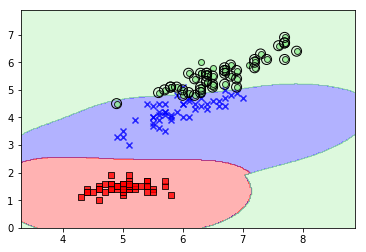

In [40]:
# RBF kernel
plot_decision_regions(x,y, classifier = models[2], test_idx=range(105,150))

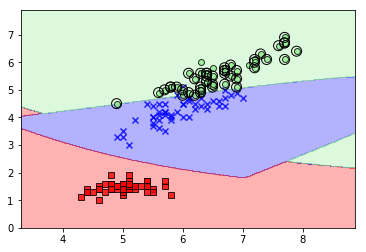

In [41]:
# poly kernel
plot_decision_regions(x,y, classifier = models[3], test_idx=range(105,150))